imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Heart attack risk prediction

im gonna load the dataset for heart attack

In [3]:
data = pd.read_csv('heart_attack_risk_dataset.csv')
data

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,Moderate
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
4,38,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,21,Male,0,0,Low,39.93,0,0,269.9,171,113,0,High,Typical,Reversible defect,0,ST-T abnormality,0,122,High
49996,35,Female,0,0,Low,18.10,0,0,235.8,146,71,0,Moderate,Non-anginal,Fixed defect,1,ST-T abnormality,0,121,Moderate
49997,46,Male,0,1,High,21.42,0,0,172.8,146,85,1,Low,Typical,Fixed defect,0,Left Ventricular Hypertrophy,0,125,Low
49998,56,Male,0,1,Low,29.93,0,0,244.1,151,110,0,Low,Asymptomatic,Reversible defect,0,Normal,0,149,Moderate


visualizing the data

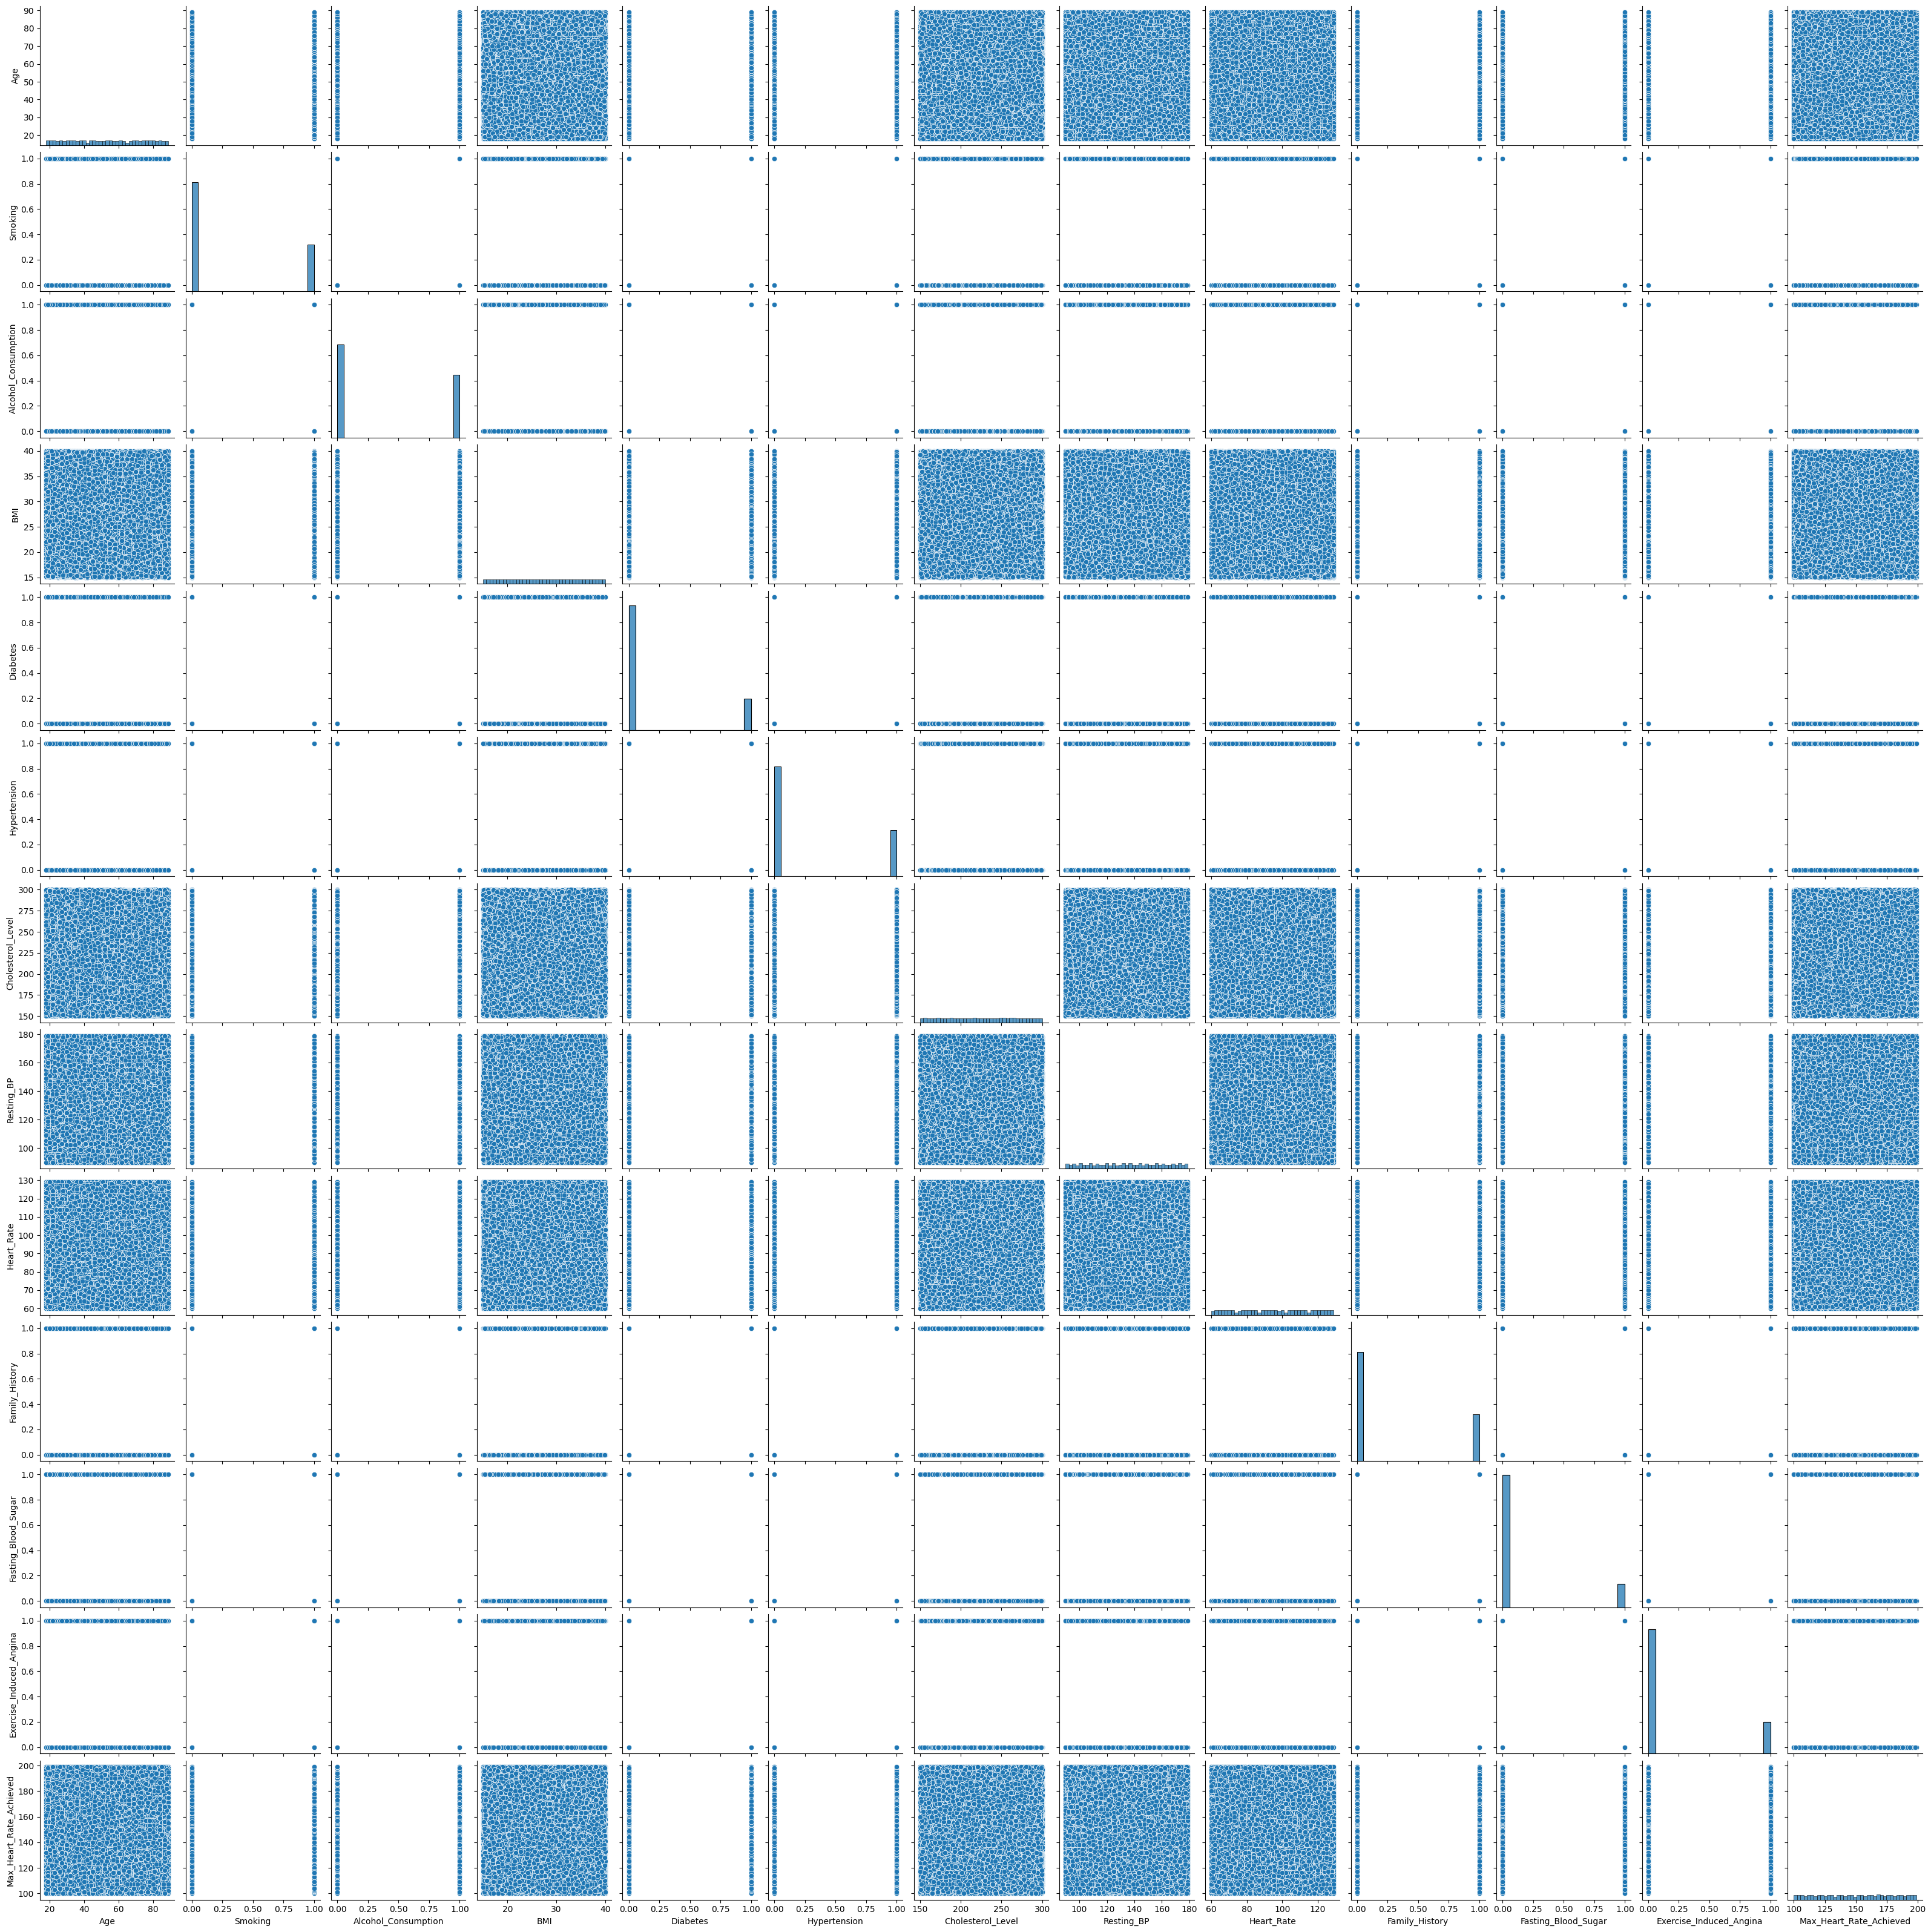

In [5]:
import seaborn as sns


sns.pairplot(data)
plt.show()

im handling the missing fi there are

In [6]:
data.isnull().sum()

,0
Age,0
Gender,0
Smoking,0
Alcohol_Consumption,0
Physical_Activity_Level,0
BMI,0
Diabetes,0
Hypertension,0
Cholesterol_Level,0
Resting_BP,0


one hot encoding for  categorical features

In [7]:
categorical_columns = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [8]:
data

,Age,Smoking,Alcohol_Consumption,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,...,Stress_Level_Moderate,Chest_Pain_Type_Atypical,Chest_Pain_Type_Non-anginal,Chest_Pain_Type_Typical,Thalassemia_Normal,Thalassemia_Reversible defect,ECG_Results_Normal,ECG_Results_ST-T abnormality,Heart_Attack_Risk_Low,Heart_Attack_Risk_Moderate
0,69,1,0,34.61,1,0,152.1,171,85,0,...,True,False,True,False,False,True,True,False,True,False
1,32,0,0,22.75,0,0,166.8,126,103,0,...,False,False,False,False,True,False,False,True,False,True
2,89,0,1,35.32,0,0,272.3,123,127,0,...,False,False,False,True,False,True,False,True,True,False
3,78,0,1,18.23,1,0,237.7,144,125,0,...,False,False,False,True,False,False,False,False,True,False
4,38,1,0,19.82,0,0,207.7,123,107,0,...,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,21,0,0,39.93,0,0,269.9,171,113,0,...,False,False,False,True,False,True,False,True,False,False
49996,35,0,0,18.10,0,0,235.8,146,71,0,...,True,False,True,False,False,False,False,True,False,True
49997,46,0,1,21.42,0,0,172.8,146,85,1,...,False,False,False,True,False,False,False,False,True,False
49998,56,0,1,29.93,0,0,244.1,151,110,0,...,False,False,False,False,False,True,True,False,False,True


im dividing features and target

In [10]:
X = data.drop(['Heart_Attack_Risk_Moderate', 'Heart_Attack_Risk_Low'], axis=1)
y = data['Heart_Attack_Risk_Moderate']

standart scaller

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


model building and evaluation

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

evaluation

In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6418
Classification Report:
               precision    recall  f1-score   support

       False       0.71      0.84      0.77      7070
        True       0.30      0.16      0.21      2930

    accuracy                           0.64     10000
   macro avg       0.50      0.50      0.49     10000
weighted avg       0.59      0.64      0.60     10000

Confusion Matrix:
 [[5944 1126]
 [2456  474]]


hyperparameter tuning using the cross validation

In [15]:
k_values = list(range(1, 21))
cv_scores = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(scores.mean())

visualizign the results

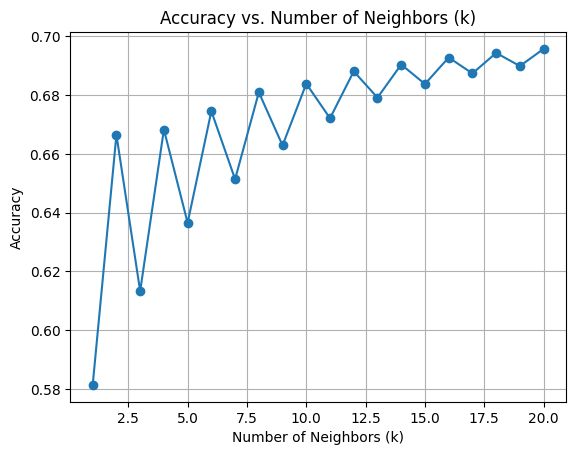

In [16]:
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.grid(True)
plt.show()

In [17]:
print("accuracy: ", max(cv_scores))

accuracy:  0.6957000000000001
